# Clustering Antarctic Penguin Species

![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
#check missing data and data tyoe
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [3]:
#summary statistics
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
#change categorical column to labels
penguins_df['sex'] = penguins_df['sex'].map({'FEMALE': 0, 'MALE': 1})

In [5]:
#check data
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [6]:
#scaling the data before doing clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_df)

In [7]:
#selecting the appropiate number of cluster using elbow method
clusters = range(1,10)
scaled_inertia =[]
for k in clusters:
    kmeans_scaled = KMeans(k)
    kmeans_scaled.fit(penguins_scaled)
    scaled_inertia.append(kmeans_scaled.inertia_)
    

C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

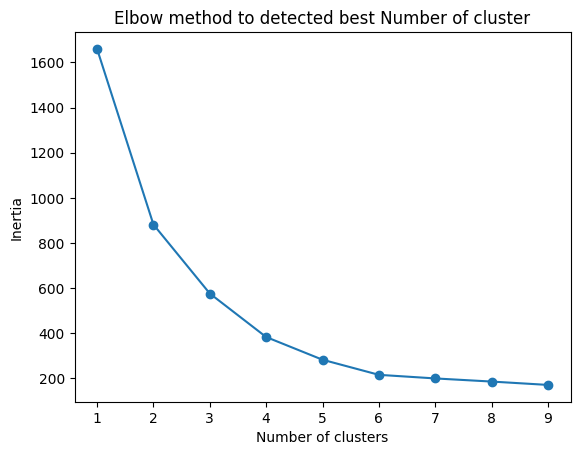

In [8]:
#plot the elbow
plt.plot(clusters, scaled_inertia,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method to detected best Number of cluster');

We will select Number of clusters to be 4

In [9]:
n_clusters = 4
k = KMeans(n_clusters)

In [10]:
k.fit(penguins_df)

C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [11]:
#show the Species 
k.labels_

array([3, 3, 0, 0, 3, 0, 1, 0, 3, 3, 0, 1, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 0,
       3, 3, 1, 0, 3, 3, 1, 0, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 3, 3, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 1, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 1, 0,
       3, 0, 3, 0, 3, 3, 1, 0, 1, 3, 3, 0, 0, 3, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 2, 3, 1, 2, 1, 3, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [14]:
#create column of species in penguines dataframe
penguins_df['species'] = best_k.labels_

In [21]:
penguins_df.iloc[:,:-2]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
327,47.2,13.7,214.0,4925.0
328,46.8,14.3,215.0,4850.0
329,50.4,15.7,222.0,5750.0
330,45.2,14.8,212.0,5200.0


In [23]:
mumeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g', 'species']

In [25]:
stat_penguins = penguins_df[mumeric_columns].groupby('species').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
0,40.101053,17.743158,188.557895,3327.894737
1,45.457895,15.661842,209.631579,4710.526316
2,49.674545,15.725455,221.709091,5548.181818
3,43.570755,18.433962,195.141509,3936.320755


## Visualization

''

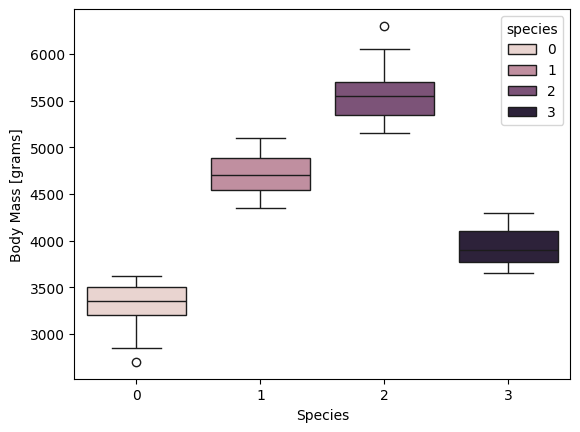

In [33]:
#plot body mass per each species
sns.boxplot(data = penguins_df, x= 'species', y = 'body_mass_g', hue = 'species' )
plt.xlabel('Species')
plt.ylabel('Body Mass [grams]')
;

Plot culmen_length_mm vs culmen_depth_mm and sowing centroids



In [41]:
centroids = k.cluster_centers_
centroids

array([[4.01010526e+01, 1.77431579e+01, 1.88557895e+02, 3.32789474e+03,
        1.57894737e-01],
       [4.54578947e+01, 1.56618421e+01, 2.09631579e+02, 4.71052632e+03,
        3.68421053e-01],
       [4.96745455e+01, 1.57254545e+01, 2.21709091e+02, 5.54818182e+03,
        9.45454545e-01],
       [4.35707547e+01, 1.84339623e+01, 1.95141509e+02, 3.93632075e+03,
        6.79245283e-01]])

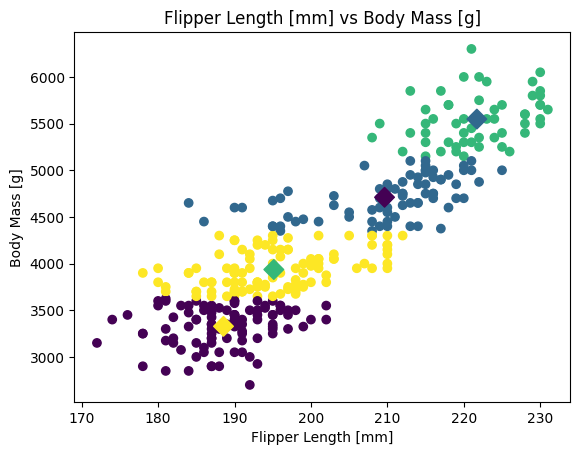

In [55]:
#show culmen length [mm] vs culmen depth [mm] and showing centroids
centroids = k.cluster_centers_

plt.scatter(penguins_df['flipper_length_mm'], penguins_df['body_mass_g'], c = k.labels_ )
plt.scatter(x = centroids[:,2], y = centroids[:,3], marker = 'D', s= 100, c = [4,1,2,3])
plt.xlabel('Flipper Length [mm]')
plt.ylabel('Body Mass [g]')
plt.title('Flipper Length [mm] vs Body Mass [g]');

## Visualizing using TSNE

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne = TSNE(learning_rate= 100)

tsne_features = tsne.fit_transform(penguins_scaled)

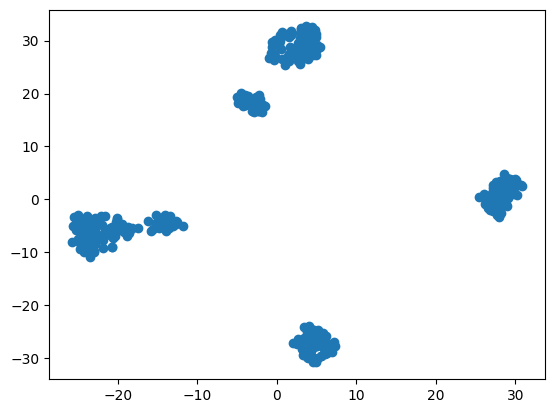

In [61]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
scatter = plt.scatter(xs, ys)
plt.show()


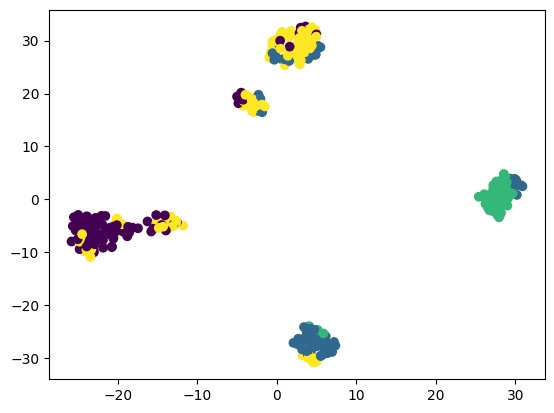

In [71]:
# Scatter plot, coloring by species
plt.scatter(xs, ys, c = penguins_df['species'])
plt.show()